___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [34]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [35]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

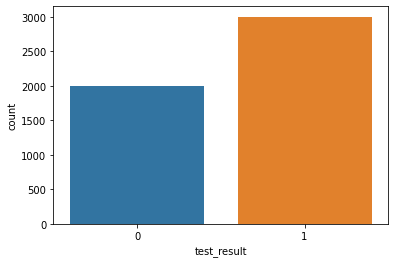

In [5]:
sns.countplot(data = df, x = 'test_result')

<AxesSubplot:xlabel='physical_score', ylabel='Count'>

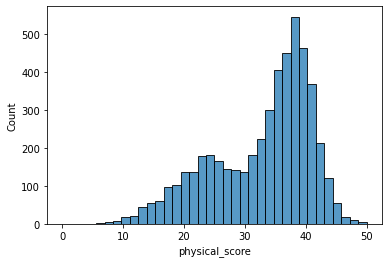

In [8]:
sns.histplot(data = df, x = 'physical_score')

<AxesSubplot:xlabel='age', ylabel='Count'>

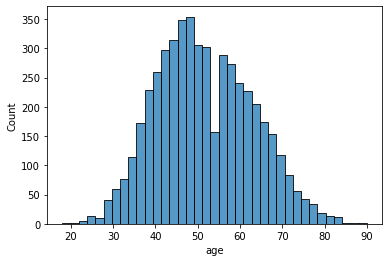

In [7]:
sns.histplot(data = df, x = 'age'a
            )

<AxesSubplot:xlabel='test_result', ylabel='count'>

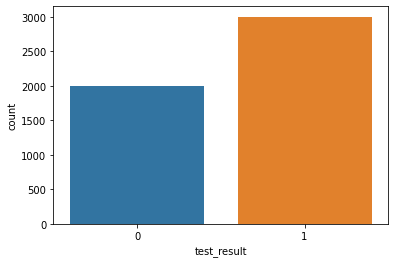

In [36]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

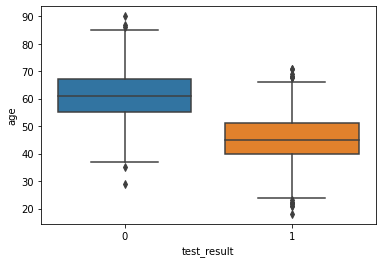

In [37]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

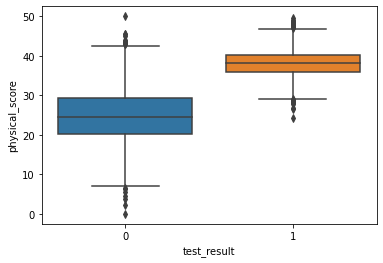

In [38]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

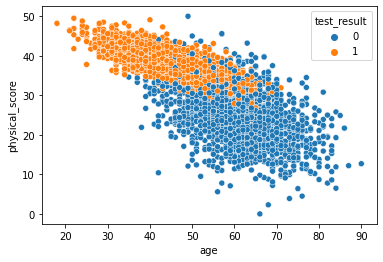

In [39]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

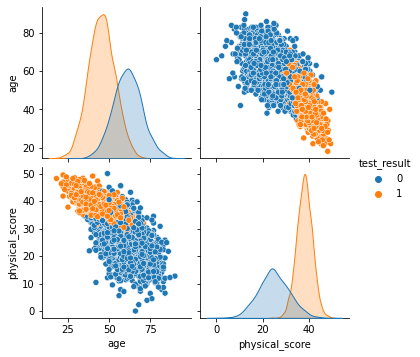

In [12]:
sns.pairplot(data = df,hue='test_result')

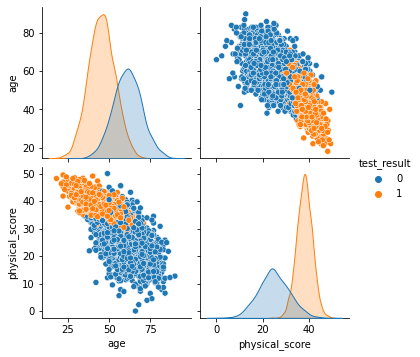

In [40]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

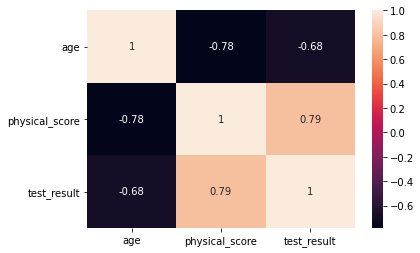

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

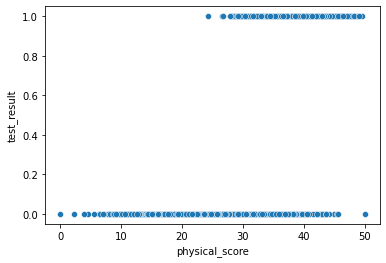

In [42]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

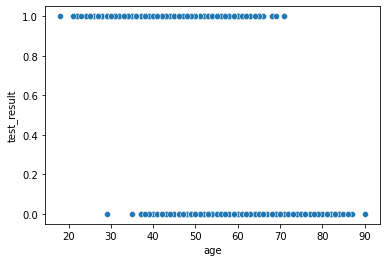

In [43]:
sns.scatterplot(x='age',y='test_result',data=df)

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

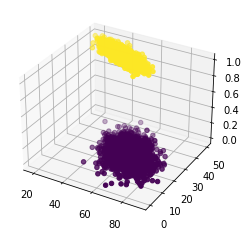

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [18]:
import plotly.express as px
px.scatter_3d(df,x = 'age', y = 'physical_score', z = 'test_result', color = 'test_result')

### Train | Test Split and Scaling

In [3]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1)

In [22]:
scaler = StandardScaler()
scaler.fit(xtrain)
Xtrain = scaler.transform(xtrain)
Xtest = scaler.transform(xtest)

## Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# help(LogisticRegression)

In [26]:
help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  
 

In [53]:
log_model = LogisticRegression()

In [54]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [24]:
model = LogisticRegression()

In [25]:
model.fit(Xtrain, ytrain)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

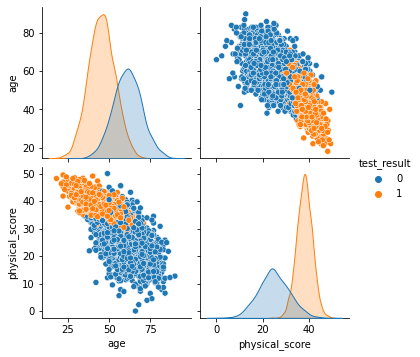

In [29]:
sns.pairplot(data = df,hue='test_result')

In [30]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [27]:
model.coef_

array([[-0.83207885,  3.52181715]])

In [35]:
model.predict(Xtest)

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [34]:
Xtest

array([[ 1.27616788e-01, -9.61081704e-02],
       [ 1.54558110e+00, -1.97147591e+00],
       [-2.17657522e+00,  1.39928310e+00],
       [ 2.16239558e-01,  3.69669438e-01],
       [ 4.82107866e-01, -1.69652003e-01],
       [-1.55621583e+00,  1.26445274e+00],
       [ 1.27971279e+00, -2.15533549e+00],
       [ 1.36833556e+00,  2.59353689e-01],
       [ 3.93485097e-01, -1.23603758e+00],
       [ 1.54558110e+00, -6.84458834e-01],
       [ 1.27616788e-01,  4.30955966e-01],
       [-5.81365368e-01,  9.70277407e-01],
       [-1.37897029e+00,  7.49645909e-01],
       [ 6.59353405e-01,  3.57412133e-01],
       [-5.81365368e-01,  4.67727882e-01],
       [ 4.82107866e-01, -1.45666908e+00],
       [ 3.04862327e-01,  2.96125605e-01],
       [ 1.01384448e+00,  1.98067161e-01],
       [ 8.36598944e-01,  7.12873992e-01],
       [ 3.89940186e-02, -2.85400191e+00],
       [-3.15497059e-01,  6.63844770e-01],
       [ 3.89940186e-02,  5.53529021e-01],
       [ 1.27616788e-01, -1.46892639e+00],
       [-1.

In [39]:
model.predict_proba(Xtest)[:,1] >= 0.5

array([ True, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True, False, False,  True,  True, False, False,  True,
        True,  True,

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Model Performance on Classification Tasks

In [36]:
x = np.linspace(0,1,100)

<ipython-input-37-1c26ed04681e>:1: RuntimeWarning:

divide by zero encountered in true_divide



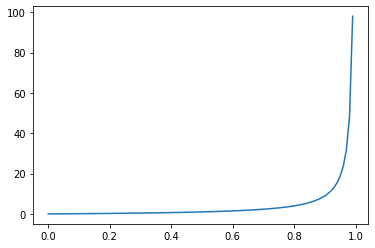

In [37]:
plt.plot(x, x/(1-x))

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [57]:
y_pred = log_model.predict(scaled_X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.93

In [59]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

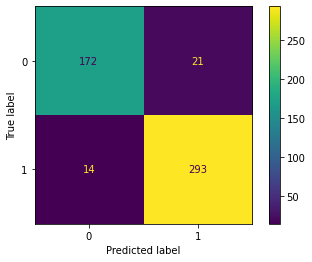

In [60]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

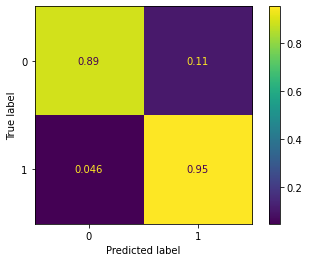

In [61]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [63]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [64]:
y_train.iloc[0]

1

In [65]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [66]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

## Evaluating Curves and AUC

**Make sure to watch the video on this!**

In [67]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

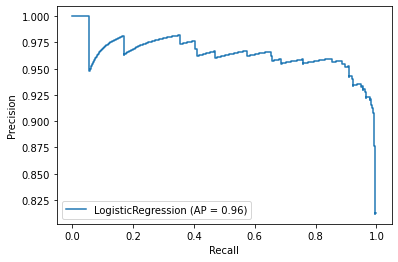

In [70]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

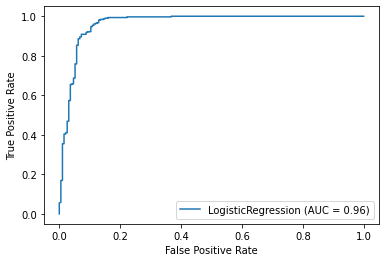

In [71]:
plot_roc_curve(log_model,scaled_X_test,y_test)

------
------

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, confusion_matrix

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.1, random_state=42)


In [8]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [9]:
ypred = model.predict(xtest)

In [11]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



In [12]:
confusion_matrix(ytest, ypred)

array([[161,  30],
       [ 17, 292]], dtype=int64)

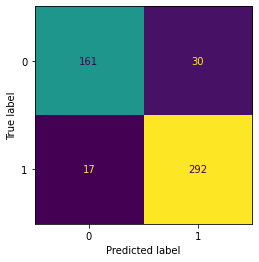

In [33]:

plot_confusion_matrix(model, xtest, ytest)
plt.gca().images[-1].colorbar.remove()


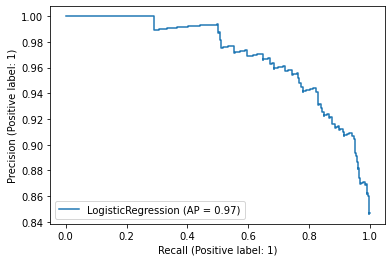

In [34]:
plot_precision_recall_curve(model, xtest, ytest)

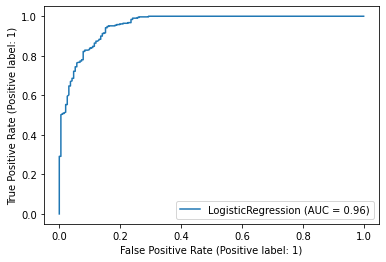

In [35]:
plot_roc_curve(model, xtest, ytest)

In [36]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])

In [62]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
Xtrain = scaler.transform(xtrain)
Xtest = scaler.transform(xtest)

In [63]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
yhat = model.predict(Xtest)
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       191
           1       0.90      0.94      0.92       309

    accuracy                           0.90       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.90      0.90      0.90       500



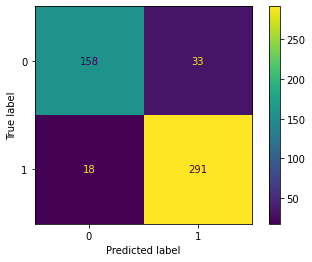

In [64]:
plot_confusion_matrix(model, Xtest, ytest)

In [65]:
from sklearn.preprocessing import StandardScaler

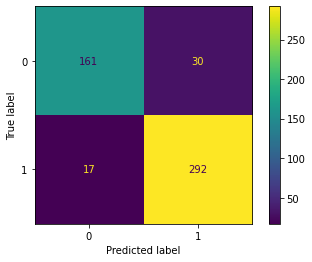

In [66]:
scaler = StandardScaler()
scaler.fit(xtrain)
Xtrain = scaler.transform(xtrain)
Xtest = scaler.transform(xtest)
model = LogisticRegression()
model.fit(Xtrain, ytrain)
yhat = model.predict(Xtest)
plot_confusion_matrix(model, Xtest, ytest)